# Model Interpretation

In [13]:
#Boston Housing Dataset: Load the boston dataset.
#from sklearn.datasets import load_boston
#boston = load_boston()

# Load the dataset
import pickle
with open('boston.pkl', 'rb') as file:
    boston = pickle.load(file)

import pandas as pd
import numpy as np
boston.data = np.delete(boston.data, obj=11, axis=1)
boston.feature_names = np.delete(boston.feature_names, obj=11, axis=0)

#Creating feature and target arrays
X = boston.data
y = boston.target

X=X[y<50]
y=y[y<50]

df_X = pd.DataFrame(X,columns=boston.feature_names)
#df_boston['target'] = y

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

In [14]:
X

array([[-0.41740129,  0.30181252, -1.29185589, ..., -0.66710128,
        -1.52727975, -1.12267925],
       [-0.41499231, -0.4869242 , -0.59332877, ..., -0.98873354,
        -0.34150355, -0.53477219],
       [-0.41499461, -0.4869242 , -0.59332877, ..., -0.98873354,
        -0.34150355, -1.25693687],
       ...,
       [-0.41115333, -0.4869242 ,  0.11987329, ..., -0.8040928 ,
         1.17628999, -1.02940553],
       [-0.40554922, -0.4869242 ,  0.11987329, ..., -0.8040928 ,
         1.17628999, -0.91069353],
       [-0.41268548, -0.4869242 ,  0.11987329, ..., -0.8040928 ,
         1.17628999, -0.71284019]])

In [15]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=3)

In [17]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, rf.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, rf.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, rf.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, rf.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, rf.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, rf.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, rf.predict(X_test))))

MAE train:  2.1914921908839347
MSE train:  8.418989683829073
RMSE train:  2.901549531513993
r2:  0.9328205472485989
MAE test:  2.3468097472014553
MSE test:  8.891926797896524
RMSE test:  2.981933399305981
r2:  0.9114025579080421


C:\Users\danil\AppData\Local\Temp\ipykernel_21492\228423845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=boston.feature_names, y=rf.feature_importances_, palette="Blues_d")


<Axes: >

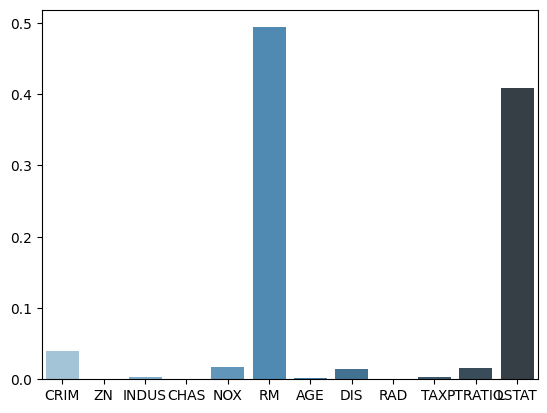

In [18]:
import seaborn as sns
sns.barplot(x=boston.feature_names, y=rf.feature_importances_, palette="Blues_d")

In [19]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(alpha=30, hidden_layer_sizes=(20,10,5), max_iter=5000, solver='sgd')
mlp.fit(X_train,y_train)

y_train_pred= mlp.predict(X_train)
y_test_pred= mlp.predict(X_test)

from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train,y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train,y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2: ",metrics.r2_score(y_train, y_train_pred))

print("MAE test: ", metrics.mean_absolute_error(y_test, y_test_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("r2: ",metrics.r2_score(y_test, y_test_pred))

MAE train:  1.632226666200186
MSE train:  4.852480537999251
RMSE train:  2.202834659705365
r2:  0.925160337483638
MAE test:  1.8762603079989741
MSE test:  6.349536603354962
RMSE test:  2.5198286853186986
r2:  0.8790740525540299


## LIME: Local Interpretable Model-Agnostic Explanations 

![lime](https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/figure4-99d9ea184dd35876e0dbae81f6fce038.jpg)

ref: Marco Tulio Ribeiro, Sameer Singh and Carlos Guestrin. Why Should {I} Trust You?: Explaining the Predictions of Any Classifier. SIGKDD16.

In [20]:
# Install the package in the current Jupyter kernel
import sys
#!conda config --append channels conda-forge
#!conda install --yes --prefix {sys.prefix} lime
#!{sys.executable} -m pip install lime

In [21]:
import lime
import lime.lime_tabular

In [22]:
boston.feature_names
# CATEGORICAL: CHAS(3), RAD(8) 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT'], dtype='<U7')

In [23]:
categorical_features=[3,8]

In [24]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=boston.feature_names, categorical_features=categorical_features, verbose=True, mode='regression')

In [25]:
y_train[:11]

array([ 7.5, 33.4, 18.6, 19.5, 18.7, 21.7, 20.1, 19.4, 21. , 37.2, 48.3])

In [26]:
i = 0
exp = explainer.explain_instance(X_train[i], rf.predict, num_features=5)

Intercept 22.333982939587745
Prediction_local [22.30717917]
Right: 12.696814093893092


In [36]:
exp.show_in_notebook(show_table=True)


In [28]:
exp_mlp = explainer.explain_instance(X_train[i], mlp.predict, num_features=5)

Intercept 23.12030790631813
Prediction_local [20.56554812]
Right: 9.819233061380311


In [29]:
exp_mlp.show_in_notebook(show_table=True)

In [30]:
i = 10
exp = explainer.explain_instance(X_train[i], rf.predict, num_features=5)
exp.show_in_notebook(show_table=True)

Intercept 18.777972192675147
Prediction_local [32.40965072]
Right: 42.60823509268056


In [31]:
exp_mlp = explainer.explain_instance(X_train[i], mlp.predict, num_features=5)
exp_mlp.show_in_notebook(show_table=True)

Intercept 19.09730193639303
Prediction_local [30.78890784]
Right: 43.60275239766176


## SHAP: SHapley Additive exPlanations

$$\phi_j(val)=\sum_{S\subseteq\{x_{1},\ldots,x_{p}\}\setminus\{x_j\}}\frac{|S|!\left(p-|S|-1\right)!}{p!}\left(val\left(S\cup\{x_j\}\right)-val(S)\right)$$

In [32]:
# Install the package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} shap
#!{sys.executable} -m pip install shap

In [33]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

df_X_train=pd.DataFrame(X_train,columns=boston.feature_names)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


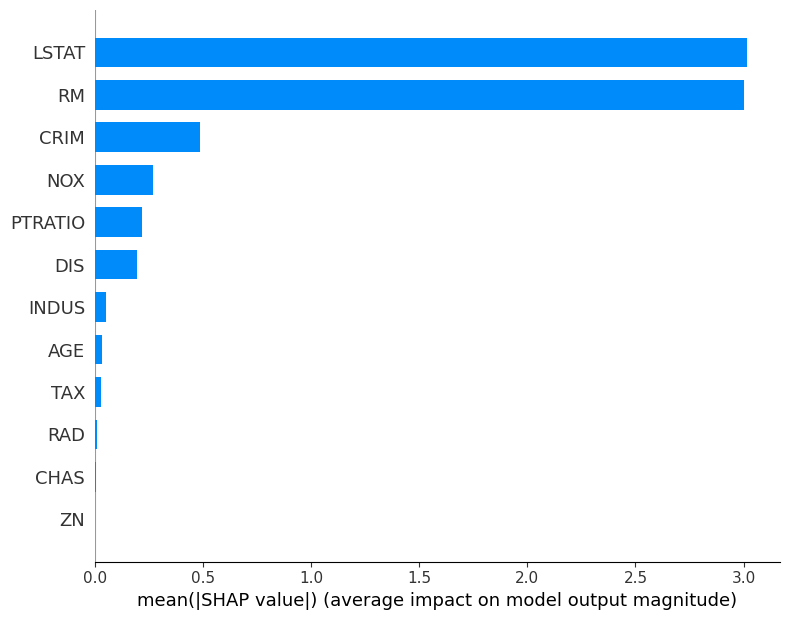

In [38]:
!pip install shap
import shap  

shap.initjs()

#explainer_rf = shap.TreeExplainer(rf,categorical_features=categorical_features)
explainer_rf = shap.TreeExplainer(rf)

shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")



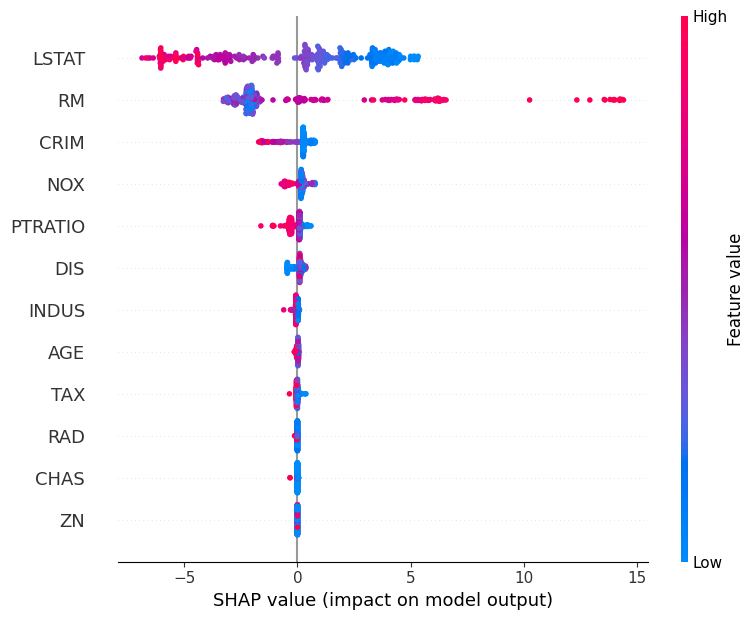

In [39]:
shap.summary_plot(shap_values, df_X_train)

In [40]:
i=0

expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], df_X_train.iloc[i,:])

In [41]:
shap.force_plot(expected_value, shap_values[i,:], df_X_train.iloc[i,:])

In [42]:
 shap.force_plot(explainer_rf.expected_value,shap_values,features=X_train,feature_names=df_X_train.columns)

In [43]:
X_train_summary = shap.kmeans(X_train, 20)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(mlp.predict, X_train_summary)
shap_values = explainer.shap_values(df_X_train)
shap.summary_plot(shap_values, df_X_train)

C:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


  0%|          | 0/343 [00:00<?, ?it/s]